In [2]:
from numpy import array
from numpy import argmax

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold','cold','warm','cold','hot','hot','warm','cold','warm','hot']
values = array(data)

label_encoder = LabelEncoder() # 정수로 인코딩 해줌
interger_encoded = label_encoder.fit_transform(values)
print("\n 정수 인코딩 \n", interger_encoded)

onehot_encoder = OneHotEncoder(sparse=False) #one-hot encoding
interger_encoded = interger_encoded.reshape(-1, 1)
onehot_encoded = onehot_encoder.fit_transform(interger_encoded) #각 원소에 대해서 one-hot 인코딩
print('\none-hot 인코딩 \n', onehot_encoded)

inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])]) #1번째 row one hot -> 실제 값
print('\n', onehot_encoded[0], ' => ', inverted)


 정수 인코딩 
 [0 0 2 0 1 1 2 0 2 1]

one-hot 인코딩 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

 [1. 0. 0.]  =>  ['cold']


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


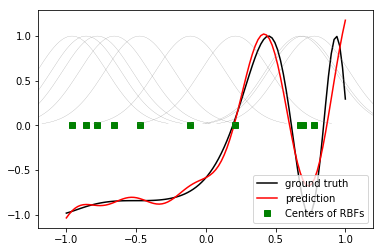

In [3]:
from scipy import *
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt
import numpy as np

class RBF:
    
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim; self.outdim = outdim; self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        # indim * numCenters 크기로 uniform random값
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim)) #weight initialize
    
    def basisFunc(self, c, d):
        assert len(d) == self.indim
        return np.exp(-self.beta * norm(c - d) ** 2) #rbf function
    
    def activationFunc(self, X):
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi, ci] = self.basisFunc(c, x)
        return G
    
    def train(self, X, Y):
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters] #random으로 숫자 배열
        self.centers = [X[i, :] for i in rnd_idx] # select random center
        G = self.activationFunc(X)
        self.W = np.dot(pinv(G), Y)
    
    def predict(self ,X):
        G = self.activationFunc(X)
        Y = np.dot(G, self.W)
        return Y

n = 100
x = mgrid[-1:1:complex(0, n)].reshape(n, 1)
y = np.sin(3 * (x + 0.5) ** 3 - 1)

rbf = RBF(1, 10, 1)
rbf.train(x, y)
z = rbf.predict(x)

plt.figure(figsize = (6,4))
plt.plot(x, y, 'k-', label = 'ground truth')
plt.plot(x, z, 'r-', label = 'prediction')
plt.plot(rbf.centers, np.zeros(rbf.numCenters), 'gs', label = 'Centers of RBFs')

for c in rbf.centers:
    cx = np.arange(c - 0.7, c + 0.7, 0.01)
    cy = [rbf.basisFunc(np.array([cx_]), np.array([c])) for cx_ in cx]
    plt.plot(cx, cy, '-', color = 'gray', linewidth = 0.2)

plt.xlim(-1.2, 1.2)
plt.legend()
plt.show()